# To build a model for training and testing:

In [2]:
import os
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [3]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from IPython.display import display
from os import listdir
from os.path import isfile, join
from PIL import Image
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dir_name_train_CNV = 'data/OCT2017_/train/CNV'
dir_name_train_DME = 'data/OCT2017_/train/DME'
dir_name_train_DRUSEN = 'data/OCT2017_/train/DRUSEN'
dir_name_train_NORMAL = 'data/OCT2017_/train/NORMAL'

In [6]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(7, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()

In [7]:
def Images_details_Print_data(data, path):
    print(" ====== Images in: ", path)    
    for k, v in data.items():
        print("%s:\t%s" % (k, v))

def Images_details(path):
    files = [f for f in glob.glob(path + "**/*.*", recursive=True)]
    data = {}
    data['images_count'] = len(files)
    data['min_width'] = 10**100  # No image will be bigger than that
    data['max_width'] = 0
    data['min_height'] = 10**100  # No image will be bigger than that
    data['max_height'] = 0


    for f in files:
        im = Image.open(f)
        width, height = im.size
        data['min_width'] = min(width, data['min_width'])
        data['max_width'] = max(width, data['max_height'])
        data['min_height'] = min(height, data['min_height'])
        data['max_height'] = max(height, data['max_height'])

    Images_details_Print_data(data, path)


Trainned data for CNV :

 ====== Images in:  data/OCT2017_/train/CNV
images_count:	37205
min_width:	384
max_width:	1536
min_height:	496
max_height:	496



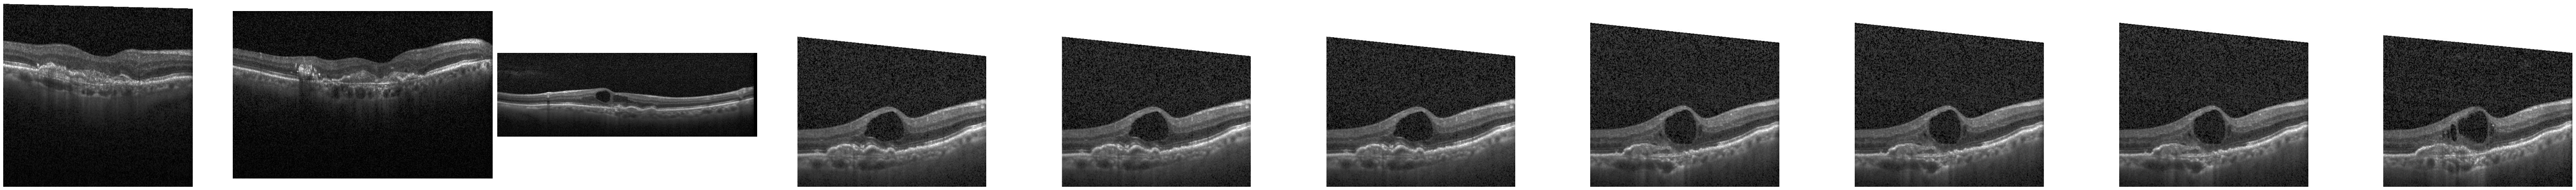

In [8]:
print("")
print("Trainned data for CNV :")
print("")
Images_details(dir_name_train_CNV)
print("")
plot_images(dir_name_train_CNV, 10)


Trainned data for DME:

 ====== Images in:  data/OCT2017_/train/DME
images_count:	11348
min_width:	512
max_width:	512
min_height:	496
max_height:	512



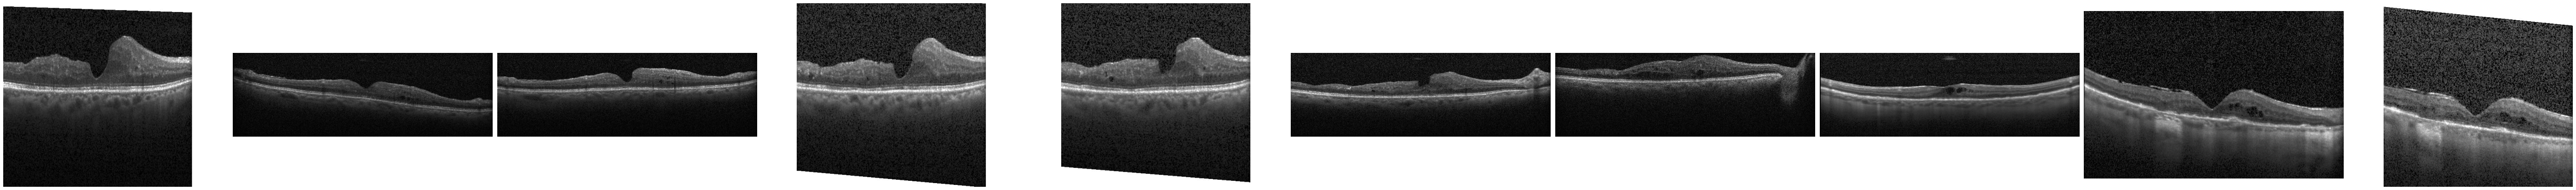

In [9]:
print("")
print("Trainned data for DME:")
print("")
Images_details(dir_name_train_DME)
print("")
plot_images(dir_name_train_DME, 10)


Trainned data for DRUSEN :

 ====== Images in:  data/OCT2017_/train/DRUSEN
images_count:	8616
min_width:	512
max_width:	768
min_height:	496
max_height:	496



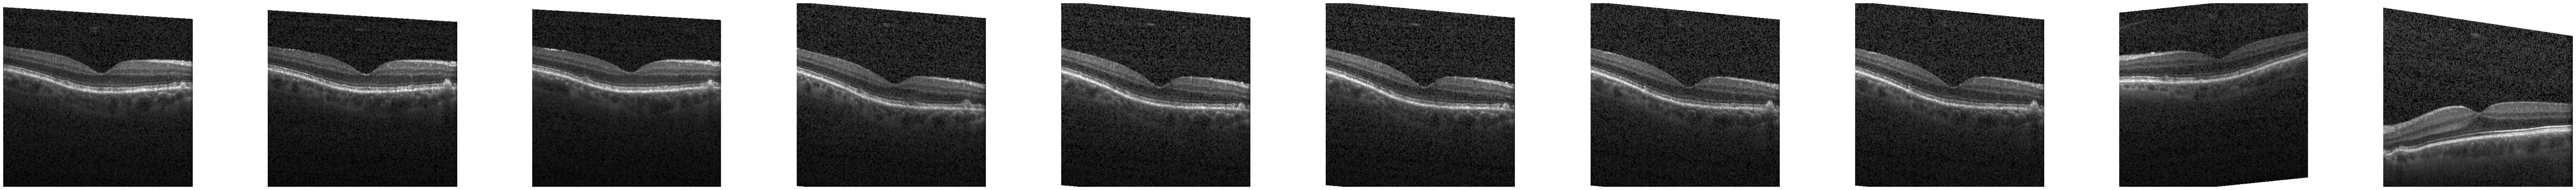

In [10]:
print("")
print("Trainned data for DRUSEN :")
print("")
Images_details(dir_name_train_DRUSEN)
print("")
plot_images(dir_name_train_DRUSEN, 10)


Trainned data for NORMAL:

 ====== Images in:  data/OCT2017_/train/NORMAL
images_count:	26315
min_width:	384
max_width:	512
min_height:	496
max_height:	512



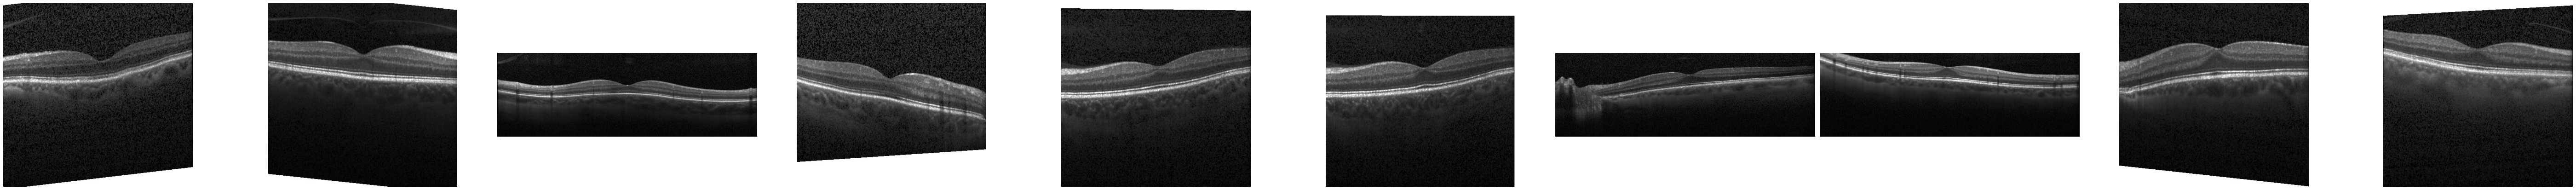

In [11]:
print("")
print("Trainned data for NORMAL:")
print("")
Images_details(dir_name_train_NORMAL)
print("")
plot_images(dir_name_train_NORMAL, 10)

In [12]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))

In [13]:
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
training_set=train_datagen.flow_from_directory('data/OCT2017_/train',target_size=(128,128),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('data/OCT2017_/test',target_size=(128,128),batch_size=32,class_mode='categorical')

Found 83484 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


In [16]:
img_dims = 150
epochs = 10
batch_size = 32

In [21]:
#### Fitting the model
history = Classifier.fit_generator(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/10
2608/2608 [==============================] - 1047s 401ms/step - loss: 0.9160 - accuracy: 0.6603 - val_loss: 1.7909 - val_accuracy: 0.5542
Epoch 2/10
2608/2608 [==============================] - 1028s 394ms/step - loss: 0.7432 - accuracy: 0.7238 - val_loss: 1.4859 - val_accuracy: 0.6344
Epoch 3/10
2608/2608 [==============================] - 1054s 404ms/step - loss: 0.6912 - accuracy: 0.7459 - val_loss: 1.7000 - val_accuracy: 0.6167
Epoch 4/10
2608/2608 [==============================] - 1029s 394ms/step - loss: 0.6667 - accuracy: 0.7554 - val_loss: 1.6705 - val_accuracy: 0.6521
Epoch 5/10
2608/2608 [==============================] - 1036s 397ms/step - loss: 0.6501 - accuracy: 0.7627 - val_loss: 1.8977 - val_accuracy: 0.6438
Epoch 6/10
2608/2608 [==============================] - 1041s 399ms/step - loss: 0.6415 - accuracy: 0.7666 - val_loss: 2.0036 - val_accuracy: 0.5813
Epoch 7/10
2608/2608 [==============================] - 1010s 387ms/step - loss: 0.6279 - accuracy: 0.7711

In [23]:
def graph():
    #Plot training & validation accuracy valuesz
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

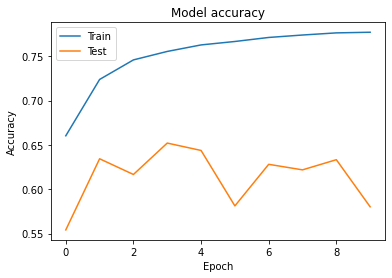

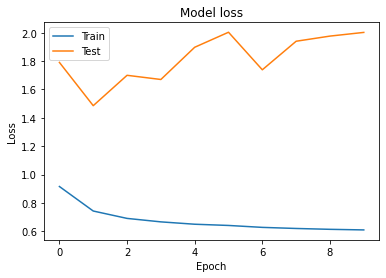

In [24]:
graph()